## 1.利用Normal Equation求解最小均方根值
     最简单的方法，实际上就是最小二乘法

In [55]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1) #返回100*1的矩阵内的数值为[0,1)的随机数
y = 6 + 2 * X + np.random.randn(100,1) #返回100*1的矩阵的正态分布

In [56]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [57]:
theta_best # 系数为3.6和3.18 对照以下4和3，可以想象到一些差距

array([[6.39030823],
       [1.58651224]])

In [58]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)  # 直接乘以系数得到预测结果
y_predict                          

array([[6.39030823],
       [9.56333271]])

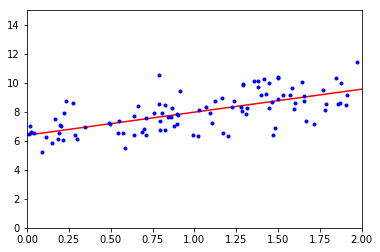

In [59]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## 2.利用scikit-learn 实现代码
利用LinearModel预测的同直接用normal equation的预测的结果不同，且计算复杂度不在一个量级，同时也可以看到上述实现模型的流程 fit和predict


In [60]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([6.39030823]), array([[1.58651224]]))

In [61]:
lin_reg.predict(X_new)  

array([[6.39030823],
       [9.56333271]])

## 3.梯度下降法 (Gradient Descent)

###### Batch Gradient Descent
批量梯度下降法，使用全部的训练集合去计算梯度，每一步都要计算所有的梯度，当训练集合太大的时候，计算速度会非常的慢, 不知为何此处计算的为何和上面差的如此之多！

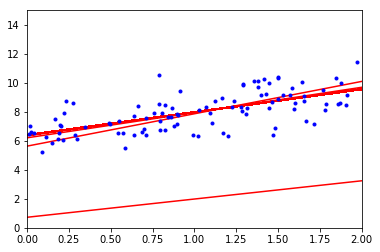

array([[6.39030823],
       [1.58651224]])

In [65]:
eta = 0.1 # 学习速率
n_iterations = 100000 # 学1000次
m = 100 # 100个训练集合

theta = np.random.randn(2,1)  #初始位置

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iterations % 50 == 0:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.axis([0,2,0,15])
plt.plot(X, y, "b.")
plt.show()

theta

随机梯度下降法,只对全体数据跑了50次就有不错的结果啦！

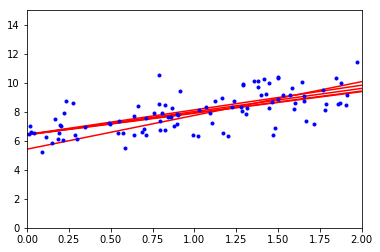

In [66]:
n_epochs = 50 

t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)
    
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    if epoch % 10 == 0:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.axis([0,2,0,15])
plt.plot(X, y, "b.")
plt.show()

In [64]:
theta

array([[6.38957679],
       [1.57055553]])

利用sklearn中的SGDRegressor可实现随机梯度下降法

In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [70]:
sgd_reg.intercept_, sgd_reg.coef_

(array([6.39037078]), array([1.57991489]))

## 4.多项式回归拟合

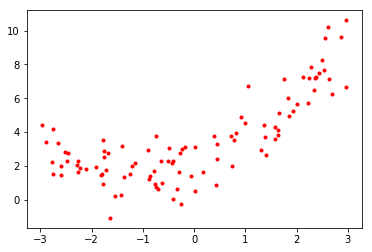

In [78]:
m = 100
X = 6 * np.random.rand(m ,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m ,1)
plt.plot(X, y, 'r.')    # 画出原始的二次图形

使用sklearn中的线性回归，先把二次项转化为一次项

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [80]:
X[0],X_poly[0] # X_poly中包含了一次项和二次项，验证如下

(array([1.58591025]), array([1.58591025, 2.51511133]))

In [81]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11026731]), array([[1.02097227, 0.46789429]]))

绘制学习曲线 learning curves

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

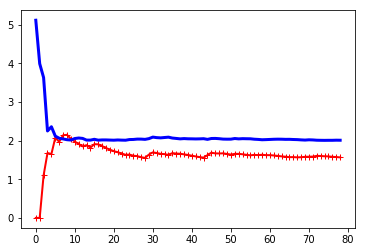

In [85]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

使用一个更高阶的多项式拟合，看看会是什么结果呢？

In [86]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
))

[0, 80, 0, 3]

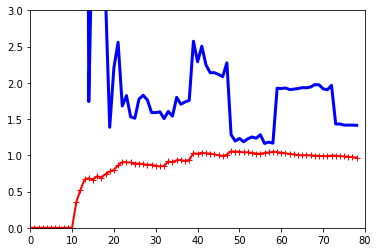

In [90]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])

## 4.正则线性模型（岭回归） 
使各个特征的系数尽可能的小，曲线也就越光滑

In [92]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.12190791]])

In [93]:
ridge_reg.intercept_, ridge_reg.coef_

(array([3.55255172]), array([[1.04623746]]))

使用SGD，并在参数里配置penalty 为‘l2’，实际上就是在cost function 上加了一个 l2范数的惩罚函数，此即岭回归

In [94]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/Users/zhenyuhuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.20508742])

In [95]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.6842715]), array([1.01387728]))

### Lasso 回归 

该回归与岭回归类似，只不过求解回归系数的时候目标函数中使用的惩罚函数上L1范数

In [96]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])  ##惩罚函数使用l1范数

/Users/zhenyuhuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.19087273])

In [97]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.62189134])

### 弹性网络 岭回归与Lasso回归的结合 

什么时候使用岭回归，Lasso回归，弹性网络呢？
相比与普通的线性回归，加一点正则化总归是要好的。一般来说，岭回归就不错了，但是当你知道特征中只有少部分起作用的时候，Lasso或者弹性网络能稀疏化模型，自动选择有用的特征并赋予较大的系数。弹性网络又比Lasso好一些，在什么时候呢？当特征数量比训练集合还大，或者很多特征是多重共线性的时候。

In [98]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.07623828])

## 5.Eealy Stopping  

In [99]:
from sklearn import base

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate='constant', eta0=0.5)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
            minimum_val_error = val_error
            best_epoch = epoch
            best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined